In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import ipywidgets as widgets
from ipywidgets import interact
from tensorflow.keras.utils import plot_model

from world_model.networks import VAE
import world_model.base.config as config

np.set_printoptions(precision=4, suppress=True)

In [2]:
vae = VAE()
vae.set_weights(os.path.join(config.RUN_FOLDER, 'vae/weights.h5'))

In [3]:
file = os.listdir(config.DATA_ROLLOUT_DIR)[200]
print(file)
obs_data = np.load(config.DATA_ROLLOUT_DIR + file)['obs']
print(obs_data.shape)

1177147308.npz
(300, 64, 64, 3)


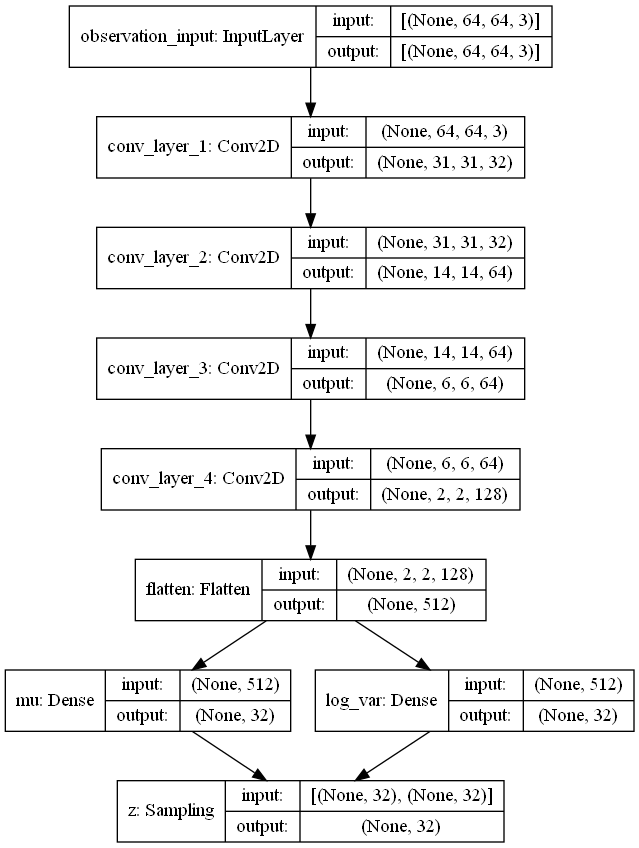

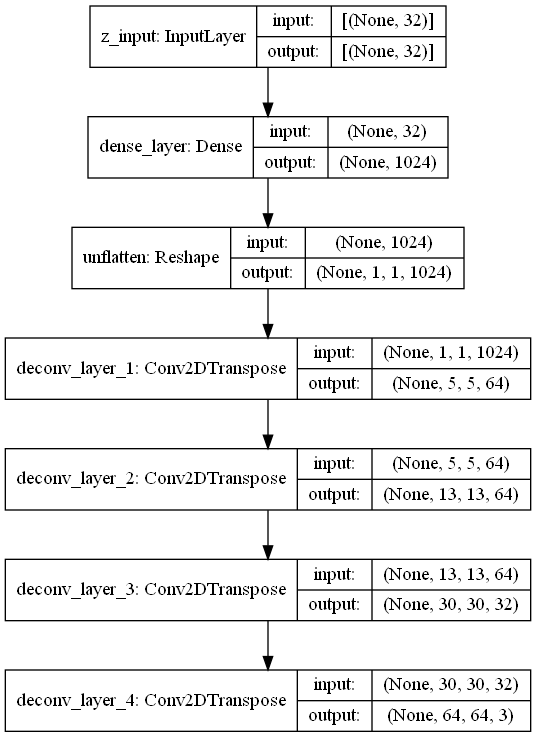

In [4]:
plot_model(vae.encoder, to_file=os.path.join(config.RUN_FOLDER, 'vae/encoder.png'), show_shapes=True)
plot_model(vae.decoder, to_file=os.path.join(config.RUN_FOLDER, 'vae/decoder.png'), show_shapes=True)

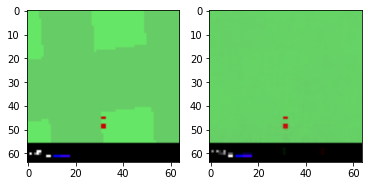

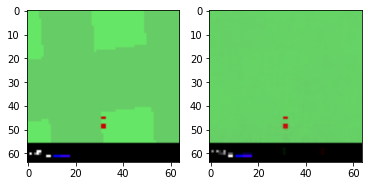

In [5]:
# output from one episode
for idx in range(0, 300):
    plt.gca().cla()

    obs = obs_data[idx]
    z_decoded = vae.full_model.predict(np.array([obs]))[0]

    plt.subplot(121)
    plt.imshow(obs)
    plt.subplot(122)
    plt.imshow(z_decoded)

    display.clear_output(wait=True)
    display.display(plt.gcf())

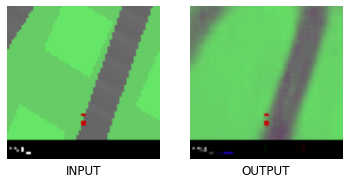

In [6]:
### output from the full_model
file = os.listdir(config.DATA_ROLLOUT_DIR)[179]
obs_data = np.load(config.DATA_ROLLOUT_DIR + file)['obs']

obs = obs_data[50]
reconstruction = vae.full_model.predict(np.array([obs]))[0]

ax1 = plt.subplot(121)
plt.imshow( obs)
ax1.axis('off')
ax1.text(0.5,-0.1, "INPUT", size=12, ha="center", 
         transform=ax1.transAxes)

ax2 = plt.subplot(122)
plt.imshow( reconstruction)
ax2.axis('off')
ax2.text(0.5,-0.1, "OUTPUT", size=12, ha="center", 
         transform=ax2.transAxes);


In [7]:
mus, log_vars, _  = vae.encoder.predict(np.array([obs]))
mu = mus[0]
log_var = log_vars[0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))

encoded_z = vae.encoder.predict(np.array([obs]))[0]
print("z = " + str(encoded_z))

mu = [-0.538   2.2278  0.0963 -0.0238 -0.0409  1.7586  0.4765 -0.1264  0.4057
  0.3519 -1.3728 -0.0765  0.0064  0.0653 -0.0054 -0.0641 -0.0116 -0.2194
  0.1809  0.8303  0.0514 -0.0263  1.1312  0.0691  0.0881 -0.0361 -0.0052
 -0.0808 -0.0424 -0.1551 -0.0811  0.0514]
log_var = [-2.4008 -2.5672 -0.0062 -0.0292 -0.0414 -4.8683 -2.3792 -0.0372 -0.8967
 -0.4106 -5.0805 -0.0852 -0.0268  0.0292  0.0276  0.0318  0.0375 -2.0768
 -2.1745 -0.6548  0.0188 -0.0597 -0.9259 -0.031   0.042  -0.0739  0.0165
  0.0021 -0.0384 -1.8925 -0.0619  0.0012]
z = [[-0.538   2.2278  0.0963 -0.0238 -0.0409  1.7586  0.4765 -0.1264  0.4057
   0.3519 -1.3728 -0.0765  0.0064  0.0653 -0.0054 -0.0641 -0.0116 -0.2194
   0.1809  0.8303  0.0514 -0.0263  1.1312  0.0691  0.0881 -0.0361 -0.0052
  -0.0808 -0.0424 -0.1551 -0.0811  0.0514]]


informative dimensions:


array([ 0,  1,  5,  6,  8, 10, 17, 18, 19, 22, 29], dtype=int64)

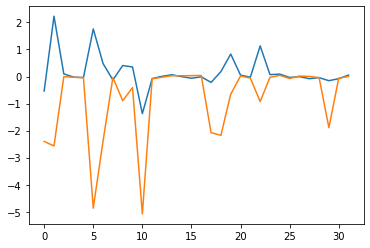

In [8]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs = np.where(abs(log_var) > 0.5)[0]
hot_zs

In [9]:
file1 = os.listdir(config.DATA_ROLLOUT_DIR)[100]
obs_data1 = np.load(config.DATA_ROLLOUT_DIR + file)['obs']
file2 = os.listdir(config.DATA_ROLLOUT_DIR)[140]
obs_data2 = np.load(config.DATA_ROLLOUT_DIR + file)['obs']

vae.encoder.predict(np.array([obs_data1[20]]))

[array([[ 1.0889,  0.0793, -0.0527, -0.0012,  0.0238,  1.8305,  0.1166,
          0.0413, -0.0156, -0.1041,  0.2274, -0.0286,  0.0221,  0.0215,
          0.0376,  0.0582,  0.0229, -0.2214, -1.0518, -0.1164, -0.0045,
          0.01  ,  0.2391, -0.0473, -0.005 , -0.0405, -0.0228,  0.0444,
          0.0418, -0.1921,  0.0824, -0.0217]], dtype=float32),
 array([[-0.9805, -0.6192, -0.0459, -0.011 , -0.006 , -3.0532, -0.5087,
         -0.0095, -0.3654, -0.2728, -4.8085, -0.001 , -0.0472, -0.0073,
         -0.0133, -0.0241,  0.0033, -0.7126, -2.2736, -0.1016, -0.0171,
         -0.0174, -0.3888, -0.0101,  0.0058, -0.0195,  0.0032, -0.0133,
         -0.0149, -1.743 , -0.0181,  0.026 ]], dtype=float32),
 array([[ 1.0605,  1.0214,  1.2086,  1.0477, -0.089 ,  1.8603,  0.8236,
          1.417 , -0.6663, -0.5538,  0.2782,  0.7198, -0.0036,  1.4225,
         -0.4794,  0.5386, -0.2818, -1.3099, -1.0172, -0.1266, -0.5131,
          0.4617,  0.1018,  0.2997,  0.8727,  0.3473,  0.9445,  0.0479,
          

Text(0.5, -0.1, 'z[7] -2.0')

Text(0.5, -0.2, 'z[10] = -2.0')

Text(0.5, -0.1, 'z[7] -2.0')

Text(0.5, -0.2, 'z[10] = -1.0')

Text(0.5, -0.1, 'z[7] -2.0')

Text(0.5, -0.2, 'z[10] = 0.0')

Text(0.5, -0.1, 'z[7] -2.0')

Text(0.5, -0.2, 'z[10] = 1.0')

Text(0.5, -0.1, 'z[7] -2.0')

Text(0.5, -0.2, 'z[10] = 2.0')

Text(0.5, -0.1, 'z[7] -1.0')

Text(0.5, -0.2, 'z[10] = -2.0')

Text(0.5, -0.1, 'z[7] -1.0')

Text(0.5, -0.2, 'z[10] = -1.0')

Text(0.5, -0.1, 'z[7] -1.0')

Text(0.5, -0.2, 'z[10] = 0.0')

Text(0.5, -0.1, 'z[7] -1.0')

Text(0.5, -0.2, 'z[10] = 1.0')

Text(0.5, -0.1, 'z[7] -1.0')

Text(0.5, -0.2, 'z[10] = 2.0')

Text(0.5, -0.1, 'z[7] 0.0')

Text(0.5, -0.2, 'z[10] = -2.0')

Text(0.5, -0.1, 'z[7] 0.0')

Text(0.5, -0.2, 'z[10] = -1.0')

Text(0.5, -0.1, 'z[7] 0.0')

Text(0.5, -0.2, 'z[10] = 0.0')

Text(0.5, -0.1, 'z[7] 0.0')

Text(0.5, -0.2, 'z[10] = 1.0')

Text(0.5, -0.1, 'z[7] 0.0')

Text(0.5, -0.2, 'z[10] = 2.0')

Text(0.5, -0.1, 'z[7] 1.0')

Text(0.5, -0.2, 'z[10] = -2.0')

Text(0.5, -0.1, 'z[7] 1.0')

Text(0.5, -0.2, 'z[10] = -1.0')

Text(0.5, -0.1, 'z[7] 1.0')

Text(0.5, -0.2, 'z[10] = 0.0')

Text(0.5, -0.1, 'z[7] 1.0')

Text(0.5, -0.2, 'z[10] = 1.0')

Text(0.5, -0.1, 'z[7] 1.0')

Text(0.5, -0.2, 'z[10] = 2.0')

Text(0.5, -0.1, 'z[7] 2.0')

Text(0.5, -0.2, 'z[10] = -2.0')

Text(0.5, -0.1, 'z[7] 2.0')

Text(0.5, -0.2, 'z[10] = -1.0')

Text(0.5, -0.1, 'z[7] 2.0')

Text(0.5, -0.2, 'z[10] = 0.0')

Text(0.5, -0.1, 'z[7] 2.0')

Text(0.5, -0.2, 'z[10] = 1.0')

Text(0.5, -0.1, 'z[7] 2.0')

Text(0.5, -0.2, 'z[10] = 2.0')

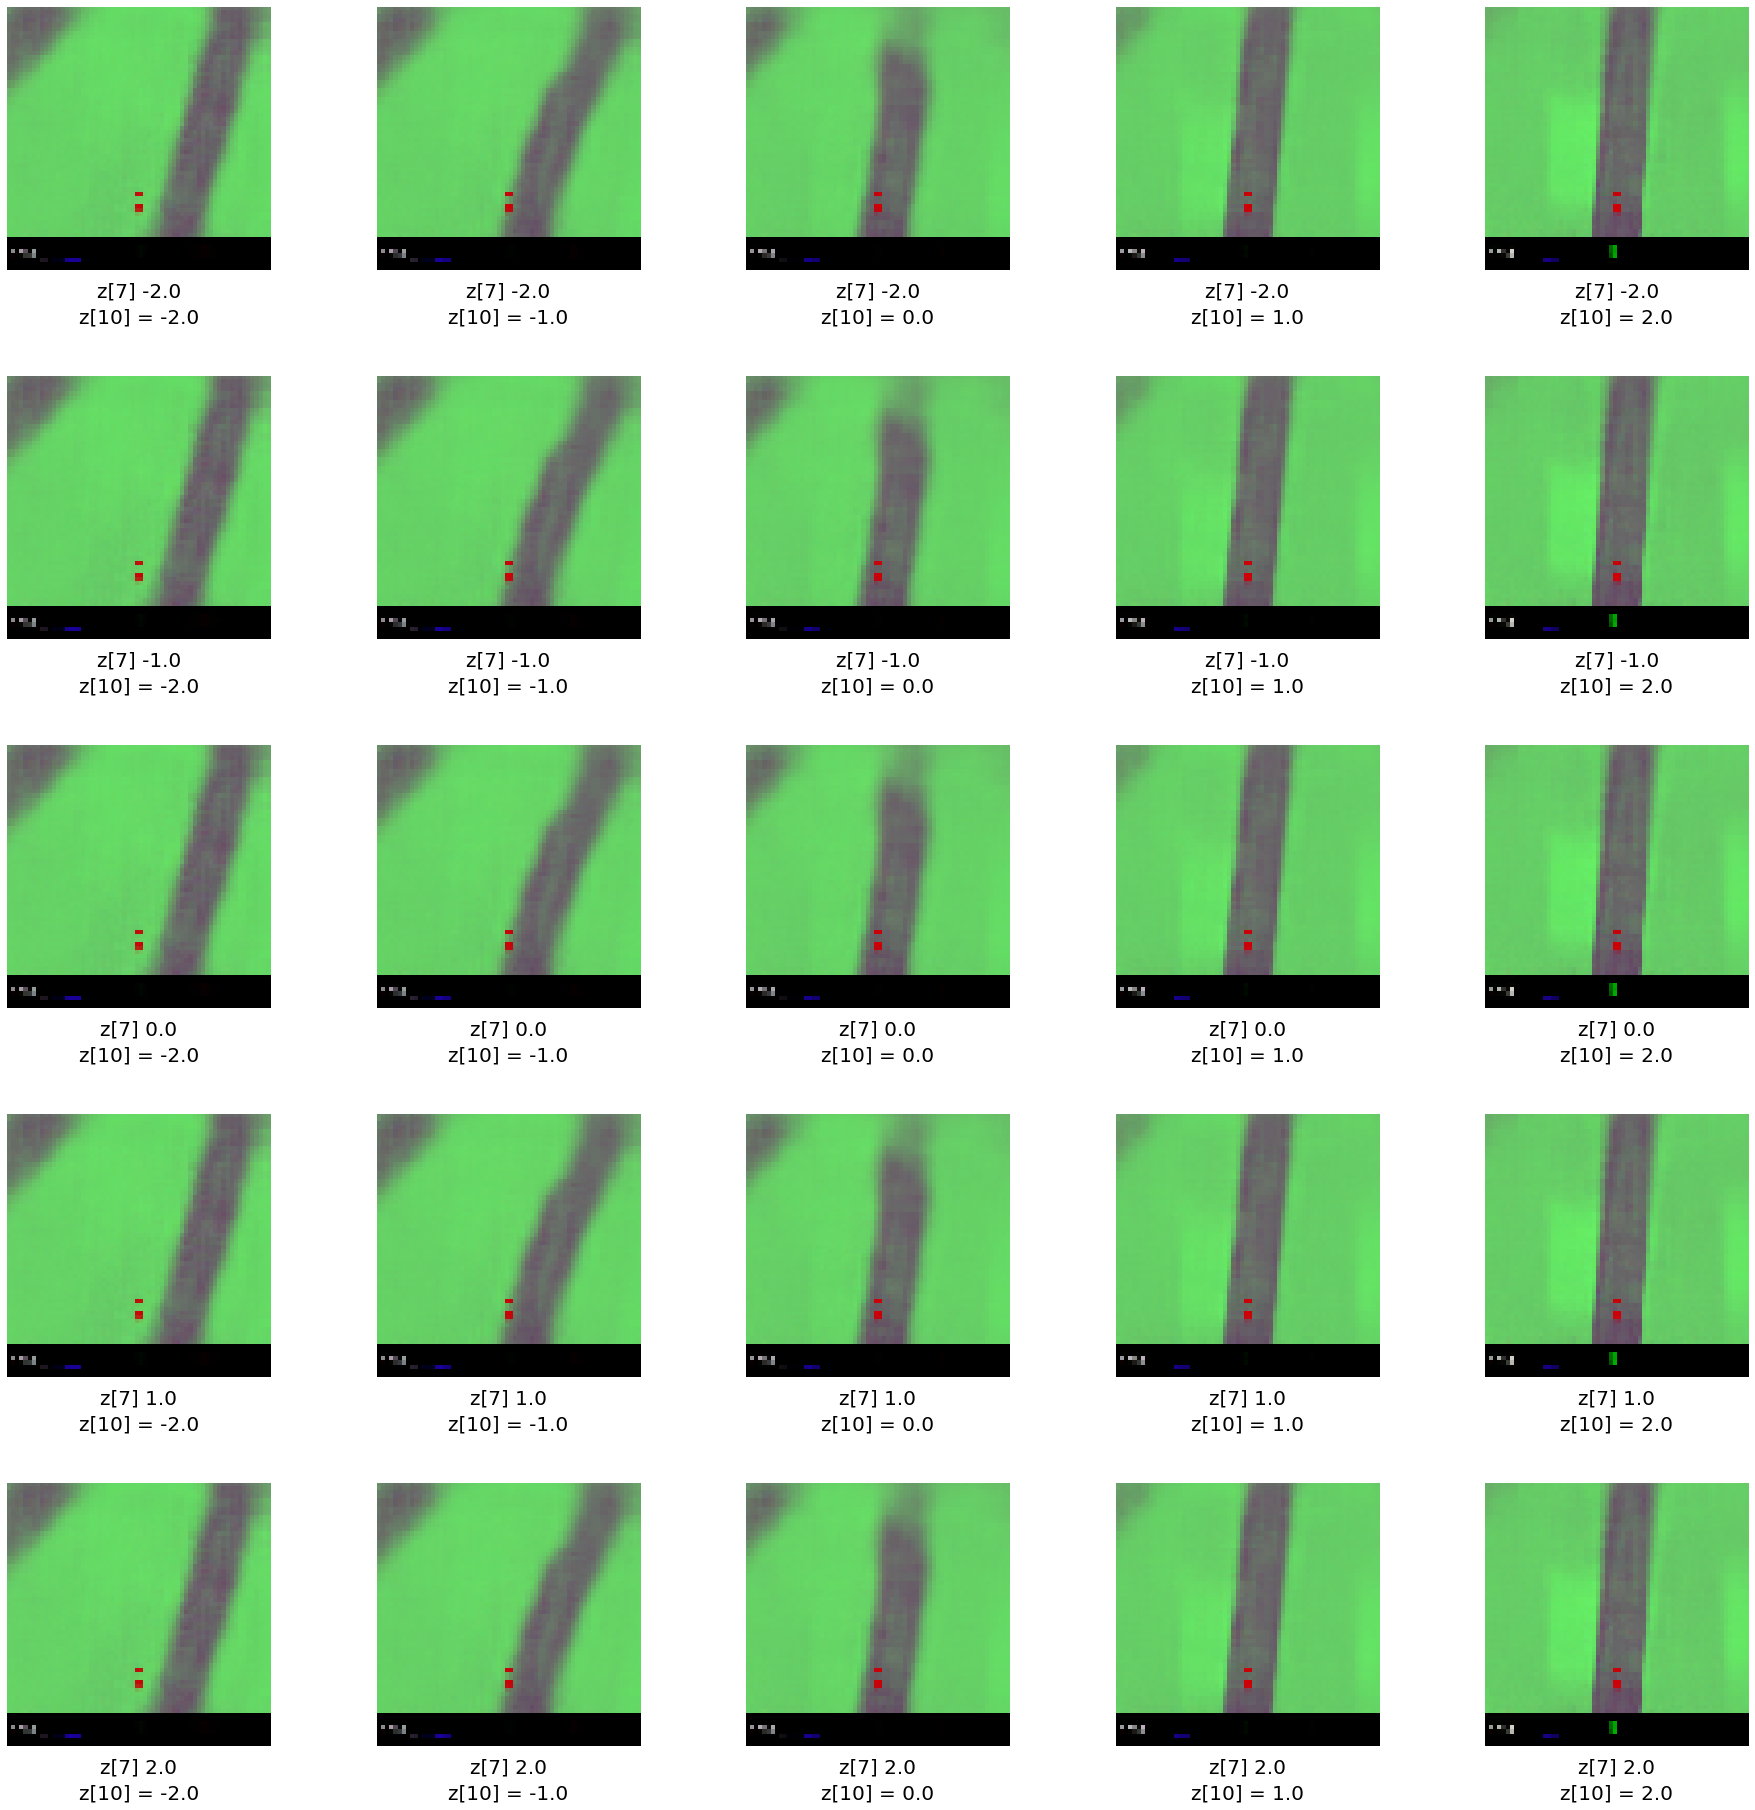

In [10]:
top_left = vae.encoder.predict(np.array([obs_data1[20]]))[2][0]
top_right = vae.encoder.predict(np.array([obs_data1[60]]))[2][0]
bottom_left = vae.encoder.predict(np.array([obs_data2[80]]))[2][0]
sample_z = vae.encoder.predict(np.array([obs_data[60]]))[2][0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)

for x in range(5):
    for y in range(5):       
        z = sample_z.copy()

        z[7] = (x-2)
        z[10] = (y-2)
        
        decoded_obs = vae.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()        
        axes[x,y].imshow(decoded_obs)
        axes[x,y].text(0.5,-0.1, 'z[7] ' + str(np.round(z[7],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        axes[x,y].text(0.5,-0.2, 'z[10] = ' + str(np.round(z[10],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

In [11]:
def play_with_z(
    z0=sample_z[0],
    z2=sample_z[2],
    z4=sample_z[4],
    z5=sample_z[5],
    z6=sample_z[6],
    z7=sample_z[7],
    z10=sample_z[10],
    z15=sample_z[15],
    z24=sample_z[24],
    z25=sample_z[25],
    z27=sample_z[27]
):
    z = sample_z.copy()
    z[0] = z0
    z[2] = z2
    z[4] = z4
    z[5] = z5
    z[6] = z6
    z[7] = z7
    z[10] = z10
    z[15] = z15
    z[24] = z24
    z[25] = z25
    z[27] = z27

    decoded_obs = vae.decoder.predict(np.array([z]))[0]
    plt.gca().cla()
    plt.imshow(decoded_obs)

In [12]:
interact(
    play_with_z, 
    z0=(-3.0, 3.0, 0.1), 
    z2=(-3.0, 3.0, 0.1), 
    z4=(-3.0, 3.0, 0.1), 
    z5=(-3.0, 3.0, 0.1), 
    z6=(-3.0, 3.0, 0.1), 
    z7=(-3.0, 3.0, 0.1), 
    z10=(-3.0, 3.0, 0.1), 
    z15=(-3.0, 3.0, 0.1), 
    z24=(-3.0, 3.0, 0.1), 
    z25=(-3.0, 3.0, 0.1), 
    z27=(-3.0, 3.0, 0.1)
)


interactive(children=(FloatSlider(value=-0.9331085681915283, description='z0', max=3.0, min=-3.0), FloatSlider…